In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Hitters.csv")

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

In [5]:
df[num_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [6]:
df = df[num_cols]

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(322, 16)

In [9]:
df = StandardScaler().fit_transform(df)

In [10]:
pca = PCA()

In [11]:
pca_fit = pca.fit_transform(df)

In [12]:
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

In [14]:
pca = PCA().fit(df)

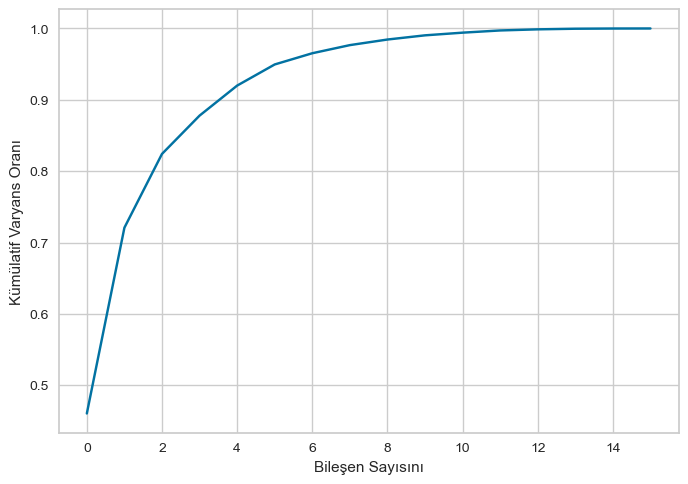

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [16]:
pca = PCA(n_components=3)

In [17]:
pca_fit = pca.fit_transform(df)

In [18]:
pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])

In [19]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

In [20]:
df = pd.read_csv("Hitters.csv")

In [21]:
df.shape

(322, 20)

In [22]:
len(pca_fit)

322

In [23]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

In [24]:
len(num_cols)

16

In [25]:
others = [col for col in df.columns if col not in num_cols]

In [26]:
others

['League', 'Division', 'Salary', 'NewLeague']

In [27]:
pd.DataFrame(pca_fit, columns=["PC1", "PC2", "PC3"]).head()

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [28]:
df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


In [29]:
final_df = pd.concat(
    [pd.DataFrame(pca_fit, columns=["PC1", "PC2", "PC3"]), df[others]], axis=1
)

In [30]:
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [32]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [33]:
for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df, col)

In [34]:
final_df.dropna(inplace=True)

In [35]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

In [36]:
lm = LinearRegression()

In [37]:
rmse = np.mean(
    np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error"))
)

In [39]:
rmse

345.60211063519677

In [40]:
y.mean()

535.9258821292775

In [41]:
cart = DecisionTreeRegressor()

In [42]:
rmse = np.mean(
    np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error"))
)

In [43]:
rmse

378.2499513382743

In [44]:
cart_params = {"max_depth": range(1, 11), "min_samples_split": range(2, 20)}
# GridSearchCV

cart_best_grid = GridSearchCV(cart, cart_params, cv=5, n_jobs=-1, verbose=True).fit(
    X, y
)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [45]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(
    X, y
)

In [46]:
rmse = np.mean(
    np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error"))
)

In [47]:
rmse

330.1964109339104

In [48]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)

In [49]:
df = pd.read_csv("breast_cancer.csv")

In [50]:
y = df["diagnosis"]
X = df.drop(["diagnosis", "id"], axis=1)

In [51]:
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=["PC1", "PC2"])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

In [52]:
pca_df = create_pca_df(X, y)

In [53]:
pca_df

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


In [54]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel("PC1", fontsize=15)
    ax.set_ylabel("PC2", fontsize=15)
    ax.set_title(f"{target.capitalize()} ", fontsize=20)
    targets = list(dataframe[target].unique())
    colors = random.sample(["r", "b", "g", "y"], len(targets))
    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(
            dataframe.loc[indices, "PC1"], dataframe.loc[indices, "PC2"], c=color, s=50
        )
    ax.legend(targets)
    ax.grid()
    plt.show()

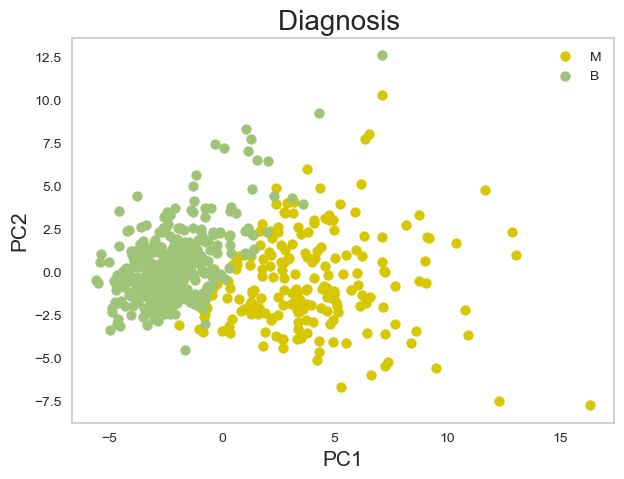

In [55]:
plot_pca(pca_df, "diagnosis")

In [56]:
import seaborn as sns

In [57]:
df = sns.load_dataset("iris")

In [58]:
y = df["species"]
X = df.drop(["species"], axis=1)

In [59]:
pca_df = create_pca_df(X, y)

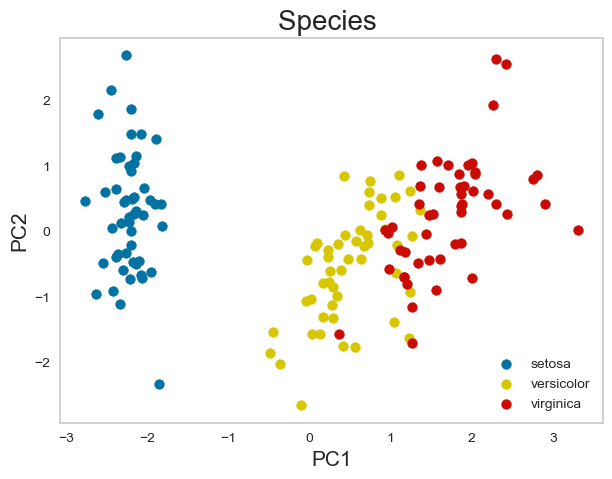

In [60]:
plot_pca(pca_df, "species")

In [61]:
df = pd.read_csv("diabetes.csv")

In [62]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [63]:
pca_df = create_pca_df(X, y)

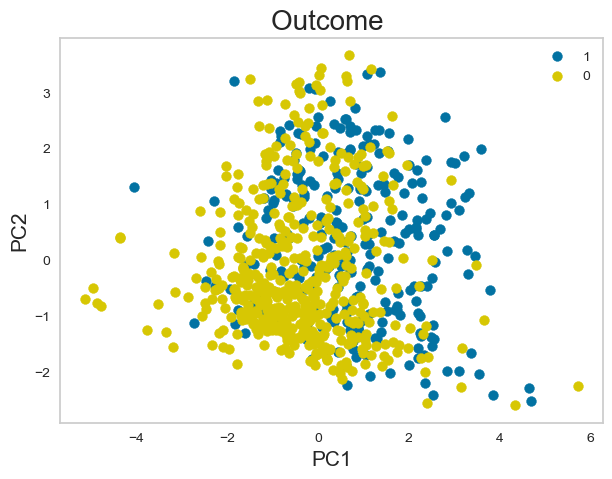

In [64]:
plot_pca(pca_df, "Outcome")